# Title

Импорт библиотек

In [36]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl

Импорт данных

In [37]:
train_df = pd.read_csv('train.csv')

In [38]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


Преобразование элементов столбца 'datetime' в формат datetime

In [39]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

In [40]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Вычленение из столбца 'datetime' месяц в столбец 'month', час в 'hour' и день недели в 'name_day'

In [41]:
train_df['month'] = train_df['datetime'].apply(lambda t: t.month)
train_df['hour'] = train_df['datetime'].apply(lambda t: t.hour)
train_df['name_day'] = train_df['datetime'].apply(lambda t: t.dayofweek)

Перетасуем столбцы так, чтоб столбцы, производные от 'datetime', находились рядом для красоты

In [42]:
train_df = train_df[['datetime', 'month', 'hour', 'name_day', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

In [43]:
train_df.head()

,datetime,month,hour,name_day,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,5,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,1,5,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,2,5,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,3,5,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,4,5,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [44]:
train_df.describe()

,datetime,month,hour,name_day,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,6.521495,11.541613,3.013963,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,4.000000,6.000000,1.000000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,7.000000,12.000000,3.000000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,10.000000,18.000000,5.000000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,12.000000,23.000000,6.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,3.444373,6.915838,2.004585,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


**Анализ завимости количества пользователей от погоды и сезона**

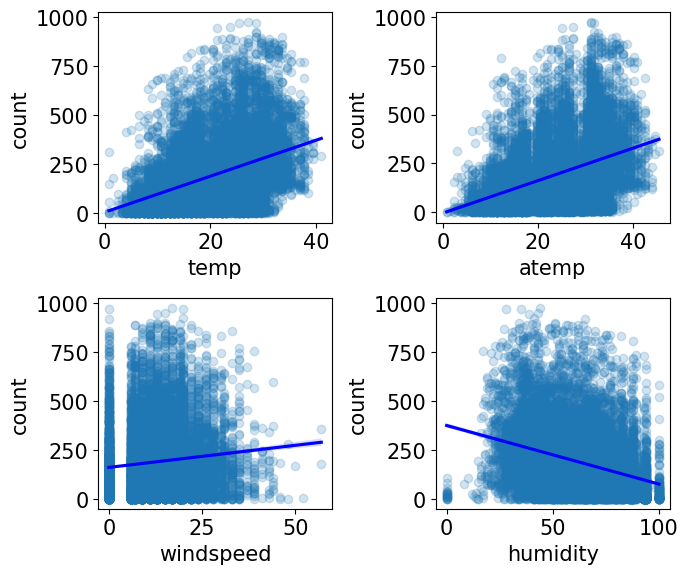

In [45]:
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7, 6)
sns.regplot(x='temp', y='count', data=train_df, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train_df, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train_df, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train_df, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

<Axes: xlabel='weather', ylabel='count'>

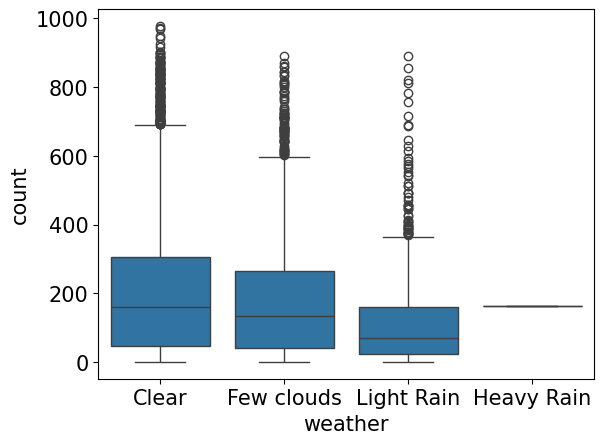

In [46]:
train_df['weather'] = train_df['weather'].map({1: 'Clear', 2: 'Few clouds', 3: 'Light Rain', 4: 'Heavy Rain'})
sns.boxplot(x='weather', y='count', data=train_df)

**Выводы**

**1.Температура** Число пользователей при температуре чуть больше 20 градусов максимально, чем ниже температура, тем меньше пользователей

**2.Скорость ветра** Число пользователей наибольшее при минимальной скорости ветра

**3.Влажность** Также как и со скоротью ветра, чем меньше, тем больше пользователей

**4.Погода** Ясная погода преобладает в выборке, что подтверждаает  еорию о том, что пользователи предпочитают более комфортную температуру для аренды велосипеда

Можно сделать вывод, что люди предпочитают брать велосипеды на прокат при максимально комфортных погодных условиях (комфортная температура, низкая скорость ветра, низкая влажность), а значит используют их в основном для прогулок.

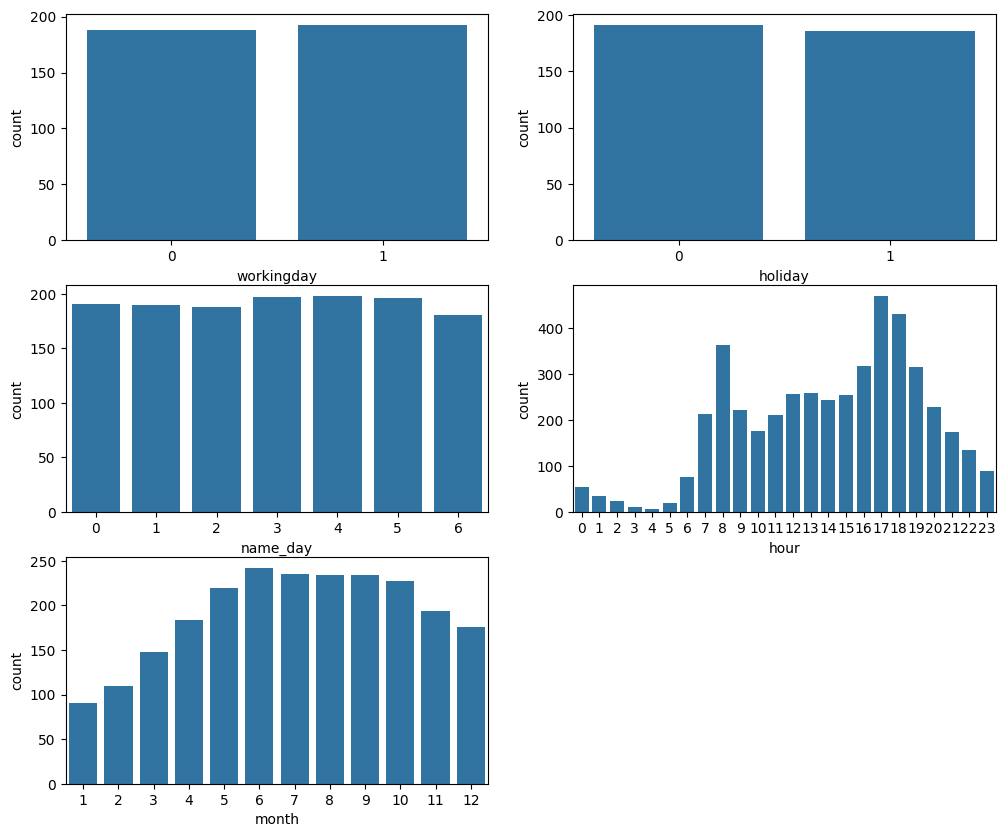

In [31]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(3,2,1)
ax1 = sns.barplot(data=train_df.groupby("workingday")["count"].mean().reset_index(), x="workingday", y="count")
ax2 = fig.add_subplot(3,2,2)
ax2 = sns.barplot(data=train_df.groupby("holiday")["count"].mean().reset_index(), x="holiday", y="count")
ax3 = fig.add_subplot(3,2,3)
ax3 = sns.barplot(data=train_df.groupby("name_day")["count"].mean().reset_index(), x="name_day", y="count")
ax4 = fig.add_subplot(3,2,4)
ax4 = sns.barplot(data=train_df.groupby("hour")["count"].mean().reset_index(), x="hour", y="count")
ax5 = fig.add_subplot(3,2,5)
ax5 = sns.barplot(data=train_df.groupby("month")["count"].mean().reset_index(), x="month", y="count")

**Выводы**

**1.Рабочие дни и праздники** В основном количество пользователей не зависит от дня, т.к. разница совсем небольшая

**2. День недели** Сильной заисимости количества пользователей от дня недели нет, немного преобладает середина недели (среда, четверг)

**3.Время суток** Наибольшое количество пользователей в 8 утра, в 5 и в 6 вчере, именно в это время люди уходят и возвращаются с работы, середина дня также встречается в выборке чаще, чем вечернее время

**4.Месяц** Чаще всего в выборке встречаются летние месяцы, что очевиднно, т.к. это теплое время года, затем количество пользователей падает и меньше всего их в январе.